## Imports and Setup

In [1]:
import sys
sys.path.append(r'..\scripts')

import numpy as np

## Kernel

### Compute Kernel if not cached

In [4]:
from compute_kernels import parallel_Li

In [14]:
#Define simulation parameters

N = 120 # Number of spatial points
zb, zt = 1, 5 #bounds
k = 2 #wave number
alpha = 4.8
dz = (zt - zb)/N

#Radius function
R = lambda z : 1
R = np.vectorize(R)

if __name__ == '__main__':
    zg, oc, L = parallel_Li(zb, zt, N, k, R, num_workers = None)

In [15]:
np.savez(f'../data_cache/discretizationN={N}.npz', zg=zg, oc=oc, L=L)

### Load Cached Kernel

In [2]:
#Define simulation parameters

N = 120 # Number of spatial points
zb, zt = 1, 5 #bounds
k = 2 #wave number
alpha = 4.8
dz = (zt - zb)/N

#Radius function
R = lambda z : 1
R = np.vectorize(R)

discretization = np.load(f'../data_cache/discretizationN={N}.npz')
zg, oc, Li = discretization['zg'], discretization['oc'], discretization['L']

## Experiments

In [3]:
from simulation import generate_and_show_plots

### Steady State Production

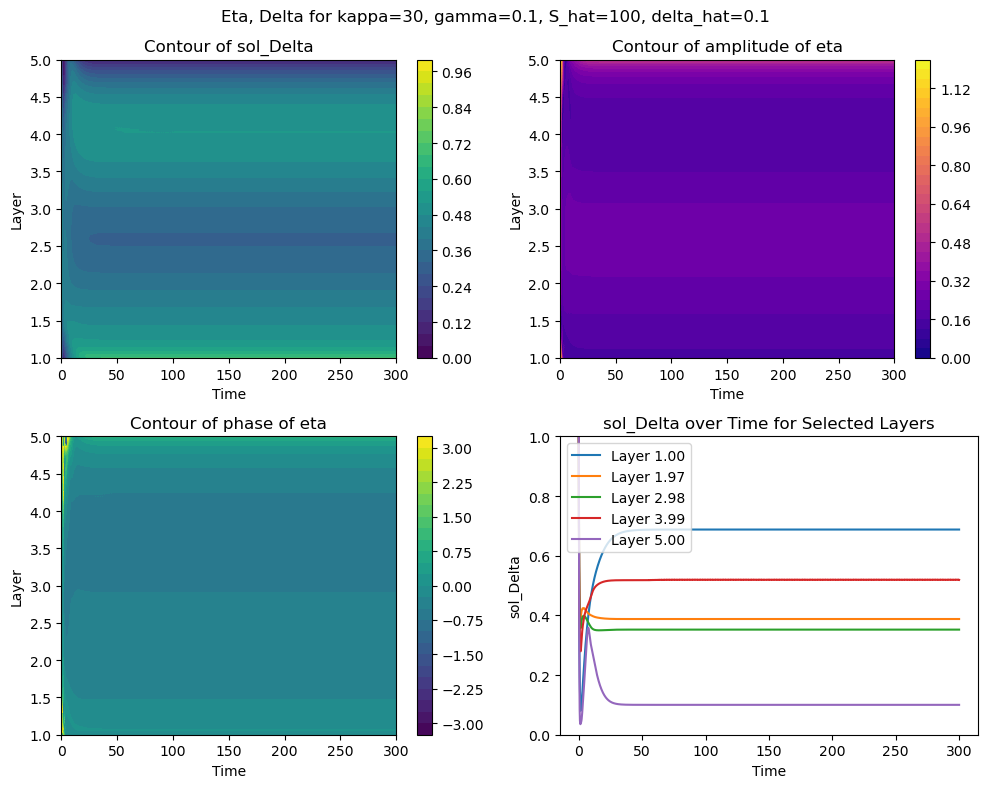

In [4]:
#Default Parameters
T_final = 300
gamma = 0.1
S_hat = 100
delta_hat = 0.1
kappa = 30
Delta0_func = lambda z : 1
eta0_func = lambda z : 1 + 0j
Delta_E = np.vectorize(lambda z : 0.5)

sol_Delta, sol_eta = generate_and_show_plots(kappa, gamma, S_hat, delta_hat, Delta0_func, eta0_func, Delta_E, R, k, zb, zt, N, T_final, Li, oc, zg, solver='RK45', levels = 30)

### Wave Dynamics

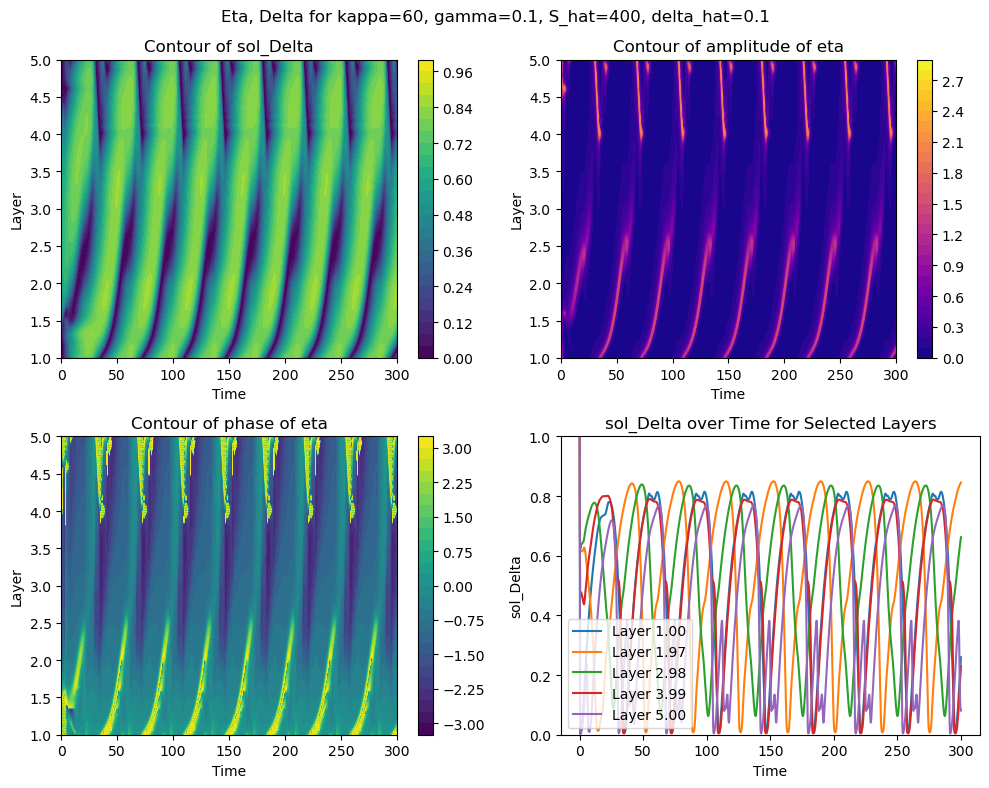

In [4]:
#Default Parameters
T_final = 300
gamma = 0.1
S_hat = 400
delta_hat = 0.1
kappa = 60
Delta0_func = lambda z : 1
eta0_func = lambda z : 1 + 0j
Delta_E = np.vectorize(lambda z : 0.5)

sol_Delta, sol_eta = generate_and_show_plots(kappa, gamma, S_hat, delta_hat, Delta0_func, eta0_func, Delta_E, R, k, zb, zt, N, T_final, Li, oc, zg, solver='RK45', levels = 30, save=True)